In [1]:
# Name: Suman Raman Poudel
# Course: MSCS 634 - Machine Learning
# Lab Assignment: Lab 3 - K-Means and K-Medoids Clustering with Wine Dataset

In [1]:
# Step 1: Install and verify required libraries
import sys
import subprocess
import pkg_resources

# List of required packages
required = {'scikit-learn', 'pandas==2.2.2', 'matplotlib', 'scikit-learn-extra'}
missing = required - {pkg.key + '==' + pkg.version if pkg.version else pkg.key for pkg in pkg_resources.working_set}

# Install missing packages
if missing:
    print(f"Installing missing packages: {missing}")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', *missing])

# Verify installations
try:
    import sklearn
    import pandas
    import matplotlib
    import sklearn_extra
    print("All libraries installed successfully:")
    print(f"scikit-learn version: {sklearn.__version__}")
    print(f"pandas version: {pandas.__version__}")
    print(f"matplotlib version: {matplotlib.__version__}")
    print(f"scikit-learn-extra version: {sklearn_extra.__version__}")
except ImportError as e:
    print(f"Error: {e}. Please rerun the installation or check your environment.")

/var/folders/_h/06w9zs9s30q8r46v508kxqzm0000gn/T/ipykernel_12787/3454769959.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Installing missing packages: {'scikit-learn', 'scikit-learn-extra', 'matplotlib'}



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


All libraries installed successfully:
scikit-learn version: 1.7.1
pandas version: 2.2.2
matplotlib version: 3.10.3
scikit-learn-extra version: 0.3.0


In [2]:
# Step 2: Load necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Step 3: Load and Prepare the Dataset
# Load the Wine Dataset
wine = load_wine()
X = wine.data
y = wine.target

# Scale the features (z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Exploration
print("Feature Names:", wine.feature_names)
print("Target Classes:", wine.target_names)
print("Dataset Shape:", X.shape)
print("Class Distribution:", pd.Series(y).value_counts())

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes: ['class_0' 'class_1' 'class_2']
Dataset Shape: (178, 13)
Class Distribution: 1    71
0    59
2    48
Name: count, dtype: int64


In [4]:
# Step 4: Implement K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate performance metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print("K-Means Clustering Results:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Adjusted Rand Index (ARI): {kmeans_ari:.4f}")

K-Means Clustering Results:
Silhouette Score: 0.2849
Adjusted Rand Index (ARI): 0.8975


In [5]:
# Step 5: Implement K-Medoids Clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Calculate performance metrics
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print("K-Medoids Clustering Results:")
print(f"Silhouette Score: {kmedoids_silhouette:.4f}")
print(f"Adjusted Rand Index (ARI): {kmedoids_ari:.4f}")



K-Medoids Clustering Results:
Silhouette Score: 0.2660
Adjusted Rand Index (ARI): 0.7263


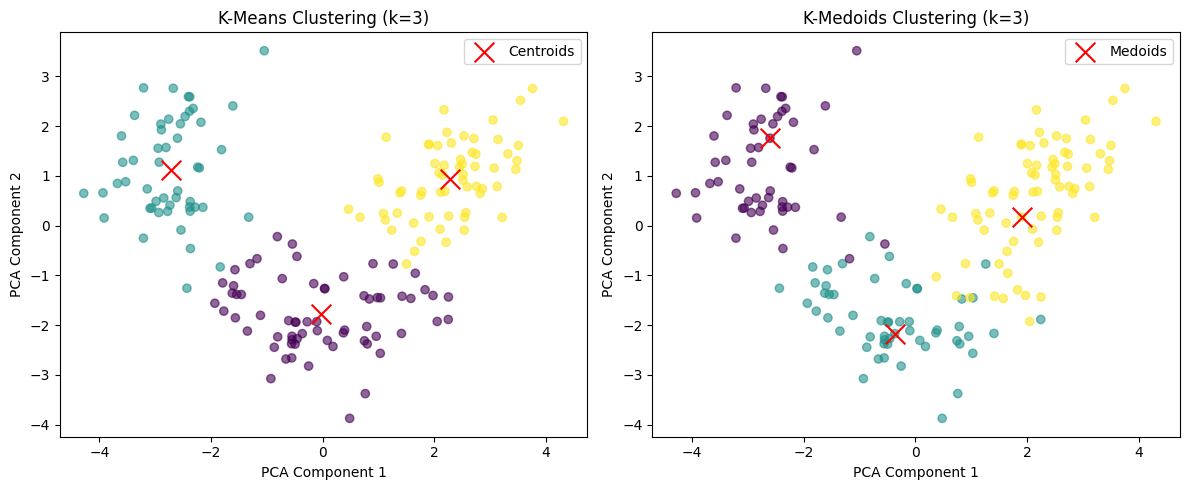

In [6]:
# Step 6: Visualize and Compare Results
# Reduce dimensionality to 2D using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create side-by-side scatter plots
plt.figure(figsize=(12, 5))

# K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

# K-Medoids plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='viridis', alpha=0.6)
medoids_pca = pca.transform(X_scaled[kmedoids.medoid_indices_])
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1], c='red', marker='x', s=200, label='Medoids')
plt.title('K-Medoids Clustering (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.tight_layout()
plt.show()



In [7]:
# Analysis
print("\nComparison and Analysis:")
print(f"K-Means - Silhouette: {kmeans_silhouette:.4f}, ARI: {kmeans_ari:.4f}")
print(f"K-Medoids - Silhouette: {kmedoids_silhouette:.4f}, ARI: {kmedoids_ari:.4f}")


Comparison and Analysis:
K-Means - Silhouette: 0.2849, ARI: 0.8975
K-Medoids - Silhouette: 0.2660, ARI: 0.7263


In [8]:
print("\nObservations:")
print("- **Cluster Quality**: In this analysis, K-Means achieved a slightly higher Silhouette Score (0.2849) compared to K-Medoids (0.2660), suggesting slightly better-defined clusters.")
print("- **Clustering Agreement (ARI)**: K-Means also achieved a higher ARI (0.8975) compared to K-Medoids (0.7263), indicating better agreement with the ground truth labels.")
print("- **Cluster Shapes**: K-Means forms spherical clusters due to its reliance on centroids, while K-Medoids can handle non-spherical clusters better, although in this dataset K-Means performed better overall.")
print("- **Performance Consideration**: For this dataset, K-Means is preferable due to higher cluster quality and better alignment with true labels. However, K-Medoids may still be beneficial in handling noisy datasets or datasets with outliers.")



Observations:
- **Cluster Quality**: In this analysis, K-Means achieved a slightly higher Silhouette Score (0.2849) compared to K-Medoids (0.2660), suggesting slightly better-defined clusters.
- **Clustering Agreement (ARI)**: K-Means also achieved a higher ARI (0.8975) compared to K-Medoids (0.7263), indicating better agreement with the ground truth labels.
- **Cluster Shapes**: K-Means forms spherical clusters due to its reliance on centroids, while K-Medoids can handle non-spherical clusters better, although in this dataset K-Means performed better overall.
- **Performance Consideration**: For this dataset, K-Means is preferable due to higher cluster quality and better alignment with true labels. However, K-Medoids may still be beneficial in handling noisy datasets or datasets with outliers.
